In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# import data from CSV file
df = pd.read_csv("../input/Canada_PermanentResidents.csv")

In [3]:
df.head()

,"Canada – Study permit holders by country of citizenship and year in which permit(s) became effective, January 2015 - February 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country of Citizenship,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN
2,NaN,Q1,NaN,NaN,NaN,Q2,NaN,NaN,NaN,Q3,NaN,NaN,NaN,Q4,NaN,NaN,NaN,2015 Total,Q1,NaN,NaN,NaN,Q2,NaN,NaN,NaN,Q3,NaN,NaN,NaN,Q4,NaN,NaN,NaN,2016 Total,Q1,NaN,NaN,NaN,Q2,NaN,NaN,NaN,Q3,NaN,NaN,NaN,Q4,NaN,NaN,NaN,2017 Total,Q1,NaN,NaN,NaN,Q2,NaN,NaN,NaN,Q3,NaN,NaN,NaN,Q4,NaN,NaN,NaN,2018 Total,Q1,NaN,NaN,2019 Total
3,NaN,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,NaN,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,NaN,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,NaN,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,NaN,Jan,Feb,Q1 Total,NaN
4,Afghanistan,10,--,--,15,10,5,5,20,10,10,15,35,5,10,10,25,90,10,--,10,25,--,10,15,30,10,10,15,35,5,5,15,25,105,15,--,5,20,5,5,5,20,10,10,20,35,5,5,5,20,85,10,--,0,10,10,--,5,20,10,10,10,30,10,5,5,20,75,15,--,15,15


In [4]:
# update 3 row index as country
df.iloc[3,0] = 'Country'

In [5]:
# take column names from row 3
df.columns = df.iloc[3,:]

In [6]:
# remove first 3 rows 
df = df.drop([0,1,2,3],axis =0)

In [7]:
# set country name as index
df = df.set_index("Country")

In [8]:
# tail records are having invalid data
df.tail(8)

3,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Q1 Total,nan
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total unique persons,"13,525","8,630","7,945","30,015","11,440","11,185","11,910","34,460","24,395","61,530","33,060","118,695","11,505","11,405","21,800","44,610","219,165","17,915","13,045","11,455","42,205","14,945","19,685","21,525","55,725","17,165","64,605","36,390","117,950","14,310","14,945","31,085","60,160","264,650","17,975","10,450","11,295","39,645","16,280","19,160","17,135","52,525","25,370","89,500","44,885","159,455","19,340","17,255","41,110","77,500","315,945","24,440","11,815","14,290","50,445","31,430","23,885","29,360","84,305","26,370","90,520","38,940","155,715","17,605","20,990","41,695","80,215","357,230","29,335","15,815","45,095","45,095"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Notes: \n— Please note that all values between 0 and 5 are shown as “--”. This is done to prevent individuals from being identified when IRCC data is compiled and compared to other publicly available statistics. All other values are rounded to the closest multiple of 5 for the same reason; as a result of rounding, data may not sum to the totals indicated.\n— Data are preliminary estimates and are subject to change\n— The total unique count may not equal to the sum of permit holders in each program as an individual may hold more than one type of permit over a given period.\n— The table on Temporary Residents (TR) has been revised to reflect the June 20, 2014 overhaul of the Temporary Foreign Worker Program (TFWP). The reporting methodology has also been revised to count TRs, which includes Foreign Workers and International Students, based on the type of permit held by a TR (effective from the date that the permit was signed, or a valid permit at the end of a given year). As a result of the changes above, the reports for each permit holder type has been separated in order to enhance clarity.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"For further information, please refer to the Facts and Figures 2015 – Immigration overview: Temporary residents overview, and the glossary of terms and concepts.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
# removing tail records including totals for each column
df = df.iloc[:-8,]

In [10]:
df.head()

3,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,Sep,Q3 Total,Oct,Nov,Dec,Q4 Total,nan,Jan,Feb,Q1 Total,nan
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10,--,--,15,10,5,5,20,10,10,15,35,5,10,10,25,90,10,--,10,25,--,10,15,30,10,10,15,35,5,5,15,25,105,15,--,5,20,5,5,5,20,10,10,20,35,5,5,5,20,85,10,--,0,10,10,--,5,20,10,10,10,30,10,5,5,20,75,15,--,15,15
Albania,10,5,--,15,10,5,5,25,10,15,20,45,10,--,15,30,110,15,--,10,25,5,10,20,35,15,25,20,60,10,20,15,45,155,10,--,10,20,10,10,15,35,15,50,25,85,15,15,15,45,175,15,10,--,25,15,20,10,45,30,55,30,115,20,20,25,65,240,25,25,55,55
Algeria,60,40,55,155,55,55,45,155,120,170,135,415,100,105,135,335,960,75,60,35,170,45,60,50,155,40,140,135,315,60,45,100,205,800,100,35,40,175,35,50,35,120,90,185,170,440,70,80,135,285,965,125,50,50,230,100,70,85,255,140,270,215,625,130,95,165,390,"1,460",275,75,350,350
Andorra,--,0,0,--,0,0,--,--,--,--,0,--,0,0,0,0,--,0,0,0,0,0,0,0,0,0,--,0,--,0,0,0,0,--,0,0,0,0,0,0,--,--,0,0,0,0,0,0,0,0,--,0,0,0,0,0,0,0,0,0,--,--,--,0,0,0,0,--,0,0,0,0
Angola,15,--,--,15,0,--,--,5,--,10,--,15,10,10,10,30,65,25,--,--,30,--,5,20,30,--,10,5,15,--,--,--,5,75,--,--,--,5,--,--,5,10,--,--,10,15,--,5,0,10,35,5,--,--,10,0,5,0,5,--,5,--,10,--,10,--,10,35,--,10,10,10


In [11]:
# created method for update column names to fetch monthly data, quarterly data and yearly data
def coll(s):
    dt = []
    year = '2015'
    for a in s:
        if str(a) == 'nan':
            dt.append(year)
            year = str(int(year)+1)
        else:
            if "Total" in a:
                dt.append(a[:2]+'_'+year)
            else:
                dt.append(a+'_'+year)
    return dt

In [12]:
# update column names
df.columns = coll(df.columns)

In [13]:
df.head()

,Jan_2015,Feb_2015,Mar_2015,Q1_2015,Apr_2015,May_2015,Jun_2015,Q2_2015,Jul_2015,Aug_2015,Sep_2015,Q3_2015,Oct_2015,Nov_2015,Dec_2015,Q4_2015,2015,Jan_2016,Feb_2016,Mar_2016,Q1_2016,Apr_2016,May_2016,Jun_2016,Q2_2016,Jul_2016,Aug_2016,Sep_2016,Q3_2016,Oct_2016,Nov_2016,Dec_2016,Q4_2016,2016,Jan_2017,Feb_2017,Mar_2017,Q1_2017,Apr_2017,May_2017,Jun_2017,Q2_2017,Jul_2017,Aug_2017,Sep_2017,Q3_2017,Oct_2017,Nov_2017,Dec_2017,Q4_2017,2017,Jan_2018,Feb_2018,Mar_2018,Q1_2018,Apr_2018,May_2018,Jun_2018,Q2_2018,Jul_2018,Aug_2018,Sep_2018,Q3_2018,Oct_2018,Nov_2018,Dec_2018,Q4_2018,2018,Jan_2019,Feb_2019,Q1_2019,2019
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10,--,--,15,10,5,5,20,10,10,15,35,5,10,10,25,90,10,--,10,25,--,10,15,30,10,10,15,35,5,5,15,25,105,15,--,5,20,5,5,5,20,10,10,20,35,5,5,5,20,85,10,--,0,10,10,--,5,20,10,10,10,30,10,5,5,20,75,15,--,15,15
Albania,10,5,--,15,10,5,5,25,10,15,20,45,10,--,15,30,110,15,--,10,25,5,10,20,35,15,25,20,60,10,20,15,45,155,10,--,10,20,10,10,15,35,15,50,25,85,15,15,15,45,175,15,10,--,25,15,20,10,45,30,55,30,115,20,20,25,65,240,25,25,55,55
Algeria,60,40,55,155,55,55,45,155,120,170,135,415,100,105,135,335,960,75,60,35,170,45,60,50,155,40,140,135,315,60,45,100,205,800,100,35,40,175,35,50,35,120,90,185,170,440,70,80,135,285,965,125,50,50,230,100,70,85,255,140,270,215,625,130,95,165,390,"1,460",275,75,350,350
Andorra,--,0,0,--,0,0,--,--,--,--,0,--,0,0,0,0,--,0,0,0,0,0,0,0,0,0,--,0,--,0,0,0,0,--,0,0,0,0,0,0,--,--,0,0,0,0,0,0,0,0,--,0,0,0,0,0,0,0,0,0,--,--,--,0,0,0,0,--,0,0,0,0
Angola,15,--,--,15,0,--,--,5,--,10,--,15,10,10,10,30,65,25,--,--,30,--,5,20,30,--,10,5,15,--,--,--,5,75,--,--,--,5,--,--,5,10,--,--,10,15,--,5,0,10,35,5,--,--,10,0,5,0,5,--,5,--,10,--,10,--,10,35,--,10,10,10


In [14]:
# few data elements are '--' for 0 values and have ',' for thousends, change data valuce to numaric
def fill(col):
    for cl in col:
        df[cl] = df[cl].apply(lambda x: '0' if x == '--' else x)
        df[cl] = df[cl].apply(lambda x: str(x).replace(',', ''))
        df[cl] = pd.to_numeric(df[cl], errors='ignore')

In [15]:
fill(df.columns)

In [16]:
df.head()

,Jan_2015,Feb_2015,Mar_2015,Q1_2015,Apr_2015,May_2015,Jun_2015,Q2_2015,Jul_2015,Aug_2015,Sep_2015,Q3_2015,Oct_2015,Nov_2015,Dec_2015,Q4_2015,2015,Jan_2016,Feb_2016,Mar_2016,Q1_2016,Apr_2016,May_2016,Jun_2016,Q2_2016,Jul_2016,Aug_2016,Sep_2016,Q3_2016,Oct_2016,Nov_2016,Dec_2016,Q4_2016,2016,Jan_2017,Feb_2017,Mar_2017,Q1_2017,Apr_2017,May_2017,Jun_2017,Q2_2017,Jul_2017,Aug_2017,Sep_2017,Q3_2017,Oct_2017,Nov_2017,Dec_2017,Q4_2017,2017,Jan_2018,Feb_2018,Mar_2018,Q1_2018,Apr_2018,May_2018,Jun_2018,Q2_2018,Jul_2018,Aug_2018,Sep_2018,Q3_2018,Oct_2018,Nov_2018,Dec_2018,Q4_2018,2018,Jan_2019,Feb_2019,Q1_2019,2019
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10,0,0,15,10,5,5,20,10,10,15,35,5,10,10,25,90,10,0,10,25,0,10,15,30,10,10,15,35,5,5,15,25,105,15,0,5,20,5,5,5,20,10,10,20,35,5,5,5,20,85,10,0,0,10,10,0,5,20,10,10,10,30,10,5,5,20,75,15,0,15,15
Albania,10,5,0,15,10,5,5,25,10,15,20,45,10,0,15,30,110,15,0,10,25,5,10,20,35,15,25,20,60,10,20,15,45,155,10,0,10,20,10,10,15,35,15,50,25,85,15,15,15,45,175,15,10,0,25,15,20,10,45,30,55,30,115,20,20,25,65,240,25,25,55,55
Algeria,60,40,55,155,55,55,45,155,120,170,135,415,100,105,135,335,960,75,60,35,170,45,60,50,155,40,140,135,315,60,45,100,205,800,100,35,40,175,35,50,35,120,90,185,170,440,70,80,135,285,965,125,50,50,230,100,70,85,255,140,270,215,625,130,95,165,390,1460,275,75,350,350
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,15,0,0,15,0,0,0,5,0,10,0,15,10,10,10,30,65,25,0,0,30,0,5,20,30,0,10,5,15,0,0,0,5,75,0,0,0,5,0,0,5,10,0,0,10,15,0,5,0,10,35,5,0,0,10,0,5,0,5,0,5,0,10,0,10,0,10,35,0,10,10,10


In [17]:
# data frame for quarterly data
df_Q = df[['Q1_2015','Q2_2015','Q3_2015','Q4_2015','Q1_2016','Q2_2016','Q3_2016','Q4_2016',
           'Q1_2017','Q2_2017','Q3_2017','Q4_2017','Q1_2018','Q2_2018','Q3_2018','Q4_2018','Q1_2019']]

In [18]:
# data frame for Year data
df_Y = df[['2015','2016','2017','2018','2019']]

In [19]:
# data frame for monthly data
df_M = df.drop(['Q1_2015','Q2_2015','Q3_2015','Q4_2015','Q1_2016','Q2_2016','Q3_2016','Q4_2016',
           'Q1_2017','Q2_2017','Q3_2017','Q4_2017','Q1_2018','Q2_2018','Q3_2018','Q4_2018','Q1_2019',
                   '2015','2016','2017','2018','2019'], axis =1)

In [20]:
df_Q.head()

,Q1_2015,Q2_2015,Q3_2015,Q4_2015,Q1_2016,Q2_2016,Q3_2016,Q4_2016,Q1_2017,Q2_2017,Q3_2017,Q4_2017,Q1_2018,Q2_2018,Q3_2018,Q4_2018,Q1_2019
Country,,,,,,,,,,,,,,,,,
Afghanistan,15,20,35,25,25,30,35,25,20,20,35,20,10,20,30,20,15
Albania,15,25,45,30,25,35,60,45,20,35,85,45,25,45,115,65,55
Algeria,155,155,415,335,170,155,315,205,175,120,440,285,230,255,625,390,350
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,15,5,15,30,30,30,15,5,5,10,15,10,10,5,10,10,10


In [21]:
df_Y.head()

,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,90,105,85,75,15
Albania,110,155,175,240,55
Algeria,960,800,965,1460,350
Andorra,0,0,0,0,0
Angola,65,75,35,35,10


In [22]:
df_M.head()

,Jan_2015,Feb_2015,Mar_2015,Apr_2015,May_2015,Jun_2015,Jul_2015,Aug_2015,Sep_2015,Oct_2015,Nov_2015,Dec_2015,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Jan_2017,Feb_2017,Mar_2017,Apr_2017,May_2017,Jun_2017,Jul_2017,Aug_2017,Sep_2017,Oct_2017,Nov_2017,Dec_2017,Jan_2018,Feb_2018,Mar_2018,Apr_2018,May_2018,Jun_2018,Jul_2018,Aug_2018,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Jan_2019,Feb_2019
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10,0,0,10,5,5,10,10,15,5,10,10,10,0,10,0,10,15,10,10,15,5,5,15,15,0,5,5,5,5,10,10,20,5,5,5,10,0,0,10,0,5,10,10,10,10,5,5,15,0
Albania,10,5,0,10,5,5,10,15,20,10,0,15,15,0,10,5,10,20,15,25,20,10,20,15,10,0,10,10,10,15,15,50,25,15,15,15,15,10,0,15,20,10,30,55,30,20,20,25,25,25
Algeria,60,40,55,55,55,45,120,170,135,100,105,135,75,60,35,45,60,50,40,140,135,60,45,100,100,35,40,35,50,35,90,185,170,70,80,135,125,50,50,100,70,85,140,270,215,130,95,165,275,75
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,15,0,0,0,0,0,0,10,0,10,10,10,25,0,0,0,5,20,0,10,5,0,0,0,0,0,0,0,0,5,0,0,10,0,5,0,5,0,0,0,5,0,0,5,0,0,10,0,0,10


* Working on monthly data

In [23]:
# Sorting data by first calumn descending order
df_M.sort_values(by = df_M.columns[0],ascending = False,inplace=True)

In [24]:
# taking only top 5 counntry data to plot, change data from rows to columns to plot line plot
data_M = df_M.head().T
data_M.head()

Country,"China, People's Republic of",India,"Korea, Republic of",France,Saudi Arabia
Jan_2015,3435,1290,1225,795,700
Feb_2015,2470,565,1020,275,755
Mar_2015,2045,775,900,260,560
Apr_2015,2575,2150,965,270,640
May_2015,3450,1625,880,320,575


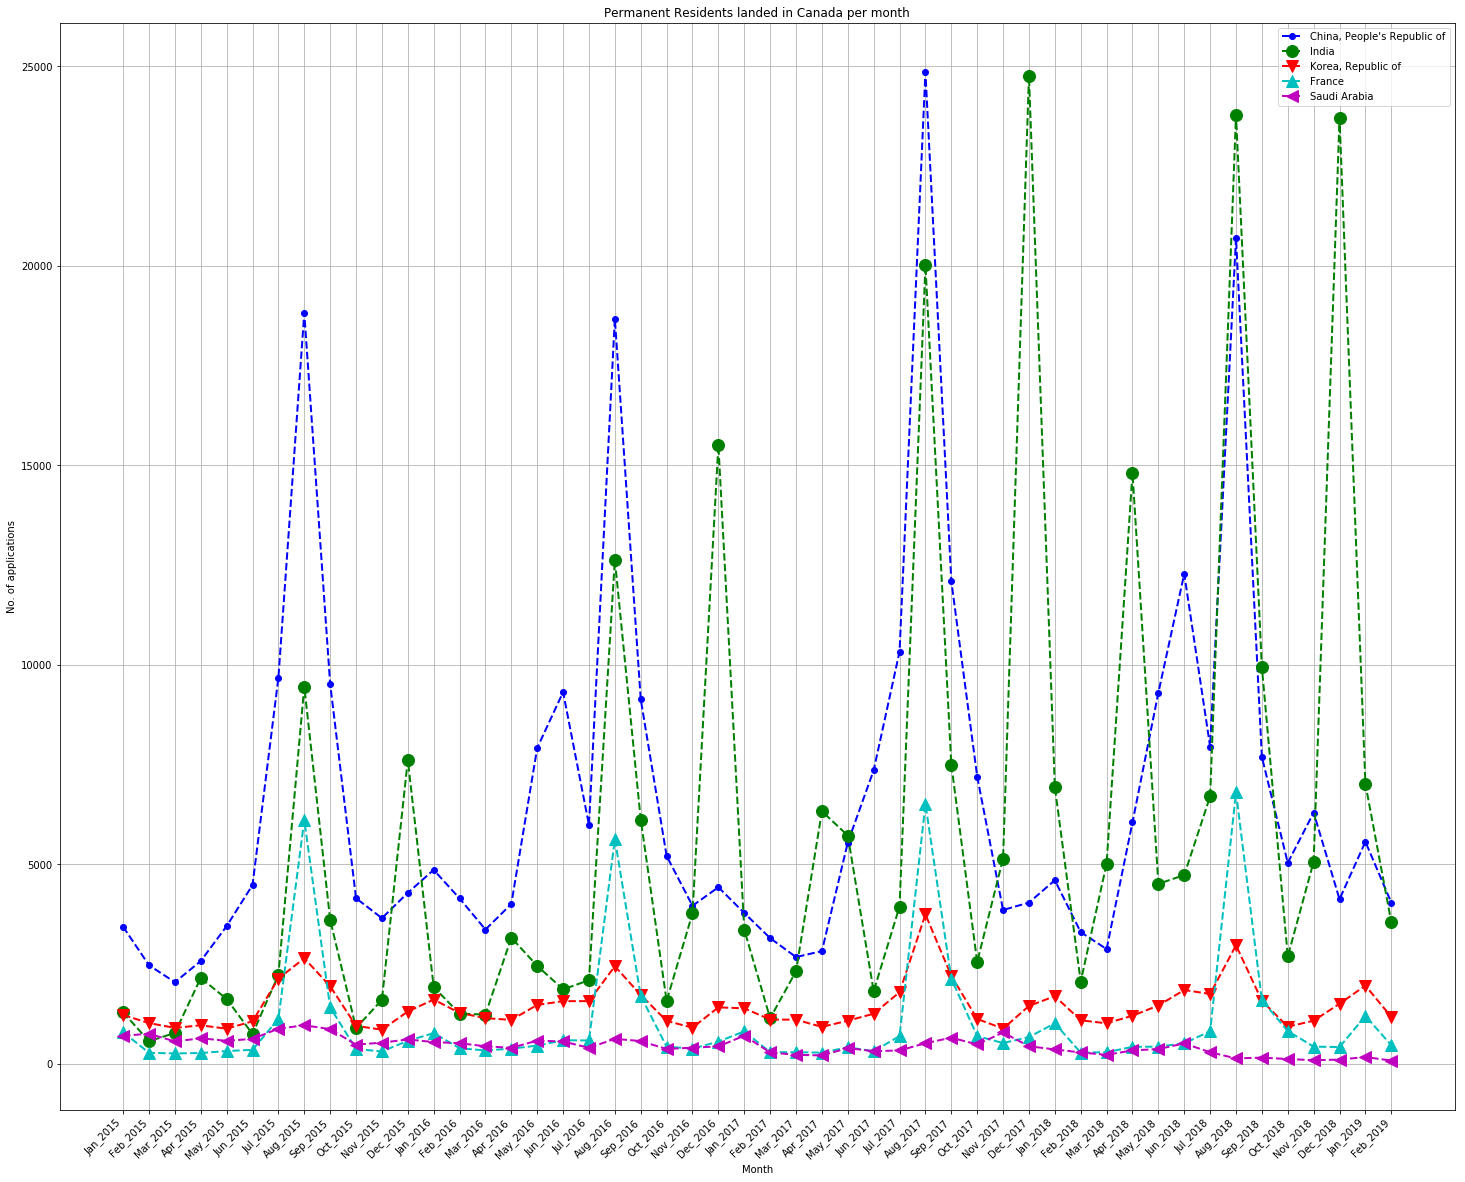

In [25]:
cl = ['b','g','r','c','m','y','k','orange','gray','pink']
mk = ['.','o','v','^','<','>','1','2','3',','] 
plt.figure(figsize=(25, 20))
plt.grid()
n = 0
for col in data_M.columns:
    plt.plot(col,data=data_M, color=cl[n], marker=mk[n], linestyle='dashed',linewidth=2, markersize=12,label= col)
    n=n+1
plt.xlabel("Month")
plt.ylabel("No. of applications")
plt.title("Permanent Residents landed in Canada per month")
plt.xticks( rotation = 45, ha="right")
plt.legend() 

Working on Quaterly data

In [26]:
# Sorting data by first calumn descending order
df_Q.sort_values(by = df_Q.columns[0],ascending = False,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df_Q.head()

,Q1_2015,Q2_2015,Q3_2015,Q4_2015,Q1_2016,Q2_2016,Q3_2016,Q4_2016,Q1_2017,Q2_2017,Q3_2017,Q4_2017,Q1_2018,Q2_2018,Q3_2018,Q4_2018,Q1_2019
Country,,,,,,,,,,,,,,,,,
"China, People's Republic of",7925,10470,37935,12060,12300,21070,33745,13535,9595,15700,47180,15040,10755,27450,36315,15435,9590
"Korea, Republic of",3140,2915,6710,3110,4015,4115,5725,3380,3600,3255,7730,3440,3795,4495,6295,3515,3125
India,2625,4515,15265,10105,4400,7460,20825,20840,6810,13865,31440,32445,14000,24005,40400,31450,10560
Saudi Arabia,2010,1840,2705,1615,1490,1525,1595,1210,1210,920,1495,1710,865,1215,580,315,250
France,1325,935,8615,1250,1480,1415,7905,1360,1390,1010,9325,1875,1585,1365,9210,1665,1660


In [28]:
# taking only top 5 counntry data to plot, change data from rows to columns to plot line plot
data_Q = df_Q.head().T
data_Q.head()

Country,"China, People's Republic of","Korea, Republic of",India,Saudi Arabia,France
Q1_2015,7925,3140,2625,2010,1325
Q2_2015,10470,2915,4515,1840,935
Q3_2015,37935,6710,15265,2705,8615
Q4_2015,12060,3110,10105,1615,1250
Q1_2016,12300,4015,4400,1490,1480


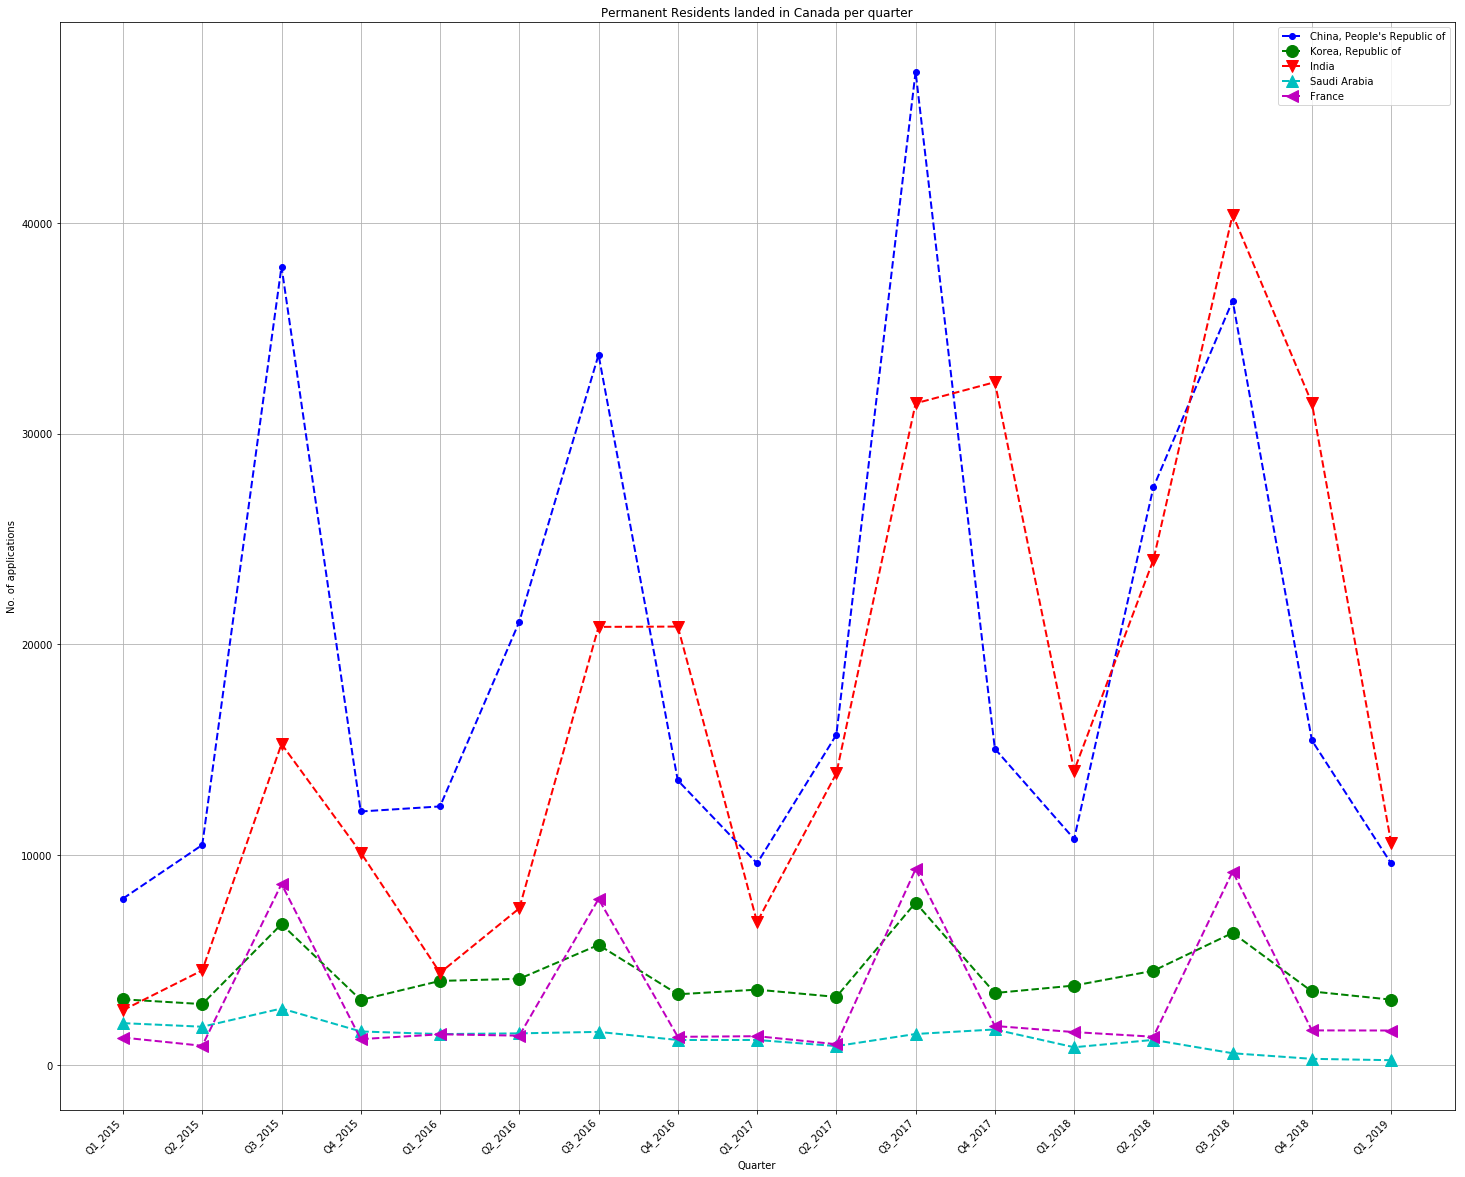

In [29]:
cl = ['b','g','r','c','m','y','k','orange','gray','pink']
mk = ['.','o','v','^','<','>','1','2','3',','] 
plt.figure(figsize=(25, 20))
plt.grid()
n = 0
for col in data_Q.columns:
    plt.plot(col,data=data_Q, color=cl[n], marker=mk[n], linestyle='dashed',linewidth=2, markersize=12,label= col)
    n=n+1
plt.xlabel("Quarter")
plt.ylabel("No. of applications")
plt.title("Permanent Residents landed in Canada per quarter")
plt.xticks( rotation = 45, ha="right")
plt.legend() 

Yearly data for 2015 to Feb 2019

In [30]:
# Sorting data by first calumn descending order
df_Y.sort_values(by = df_Y.columns[0],ascending = False,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
# taking only top 5 counntry data to plot, change data from rows to column to plot line plot
data_Y = df_Y.head().T
data_Y.head()

Country,"China, People's Republic of",India,"Korea, Republic of",France,Saudi Arabia
2015,65895,31960,14740,11860,7660
2016,76965,52705,15935,11835,5480
2017,82895,83205,16715,13255,5085
2018,85670,107570,16940,13540,2885
2019,9590,10560,3125,1660,250


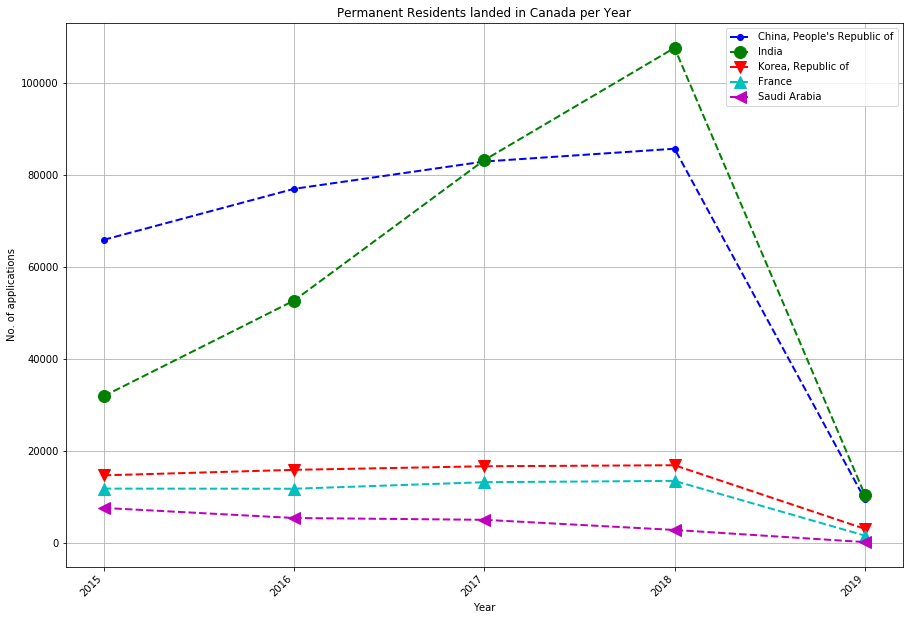

In [32]:
cl = ['b','g','r','c','m','y','k','orange','gray','pink']
mk = ['.','o','v','^','<','>','1','2','3',','] 
plt.figure(figsize=(15, 10))
plt.grid()
n = 0
for col in data_Y.columns:
    plt.plot(col,data=data_Y, color=cl[n], marker=mk[n], linestyle='dashed',linewidth=2, markersize=12,label= col)
    n=n+1
plt.xlabel("Year")
plt.ylabel("No. of applications")
plt.title("Permanent Residents landed in Canada per Year")
plt.xticks( rotation = 45, ha="right")
plt.legend() 